<a href="https://colab.research.google.com/github/HarshaniDil/Tourist_prediction/blob/main/NewTourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn import linear_model

url='https://raw.githubusercontent.com/HarshaniDil/Tourist_prediction/main/Updated2.csv'
df=pd.read_csv(url)
df
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)
indexedDataset = df.set_index(['Month'])

In [6]:
#Print top five values
from datetime import datetime
indexedDataset.head(5)

,Tourists
Month,
2014-01-28,146575
2014-02-28,141878
2014-03-28,133048
2014-04-28,112631
2014-05-28,90046


In [73]:
#last five data
from datetime import datetime
indexedDataset.tail(5)

,Tourists
Month,
2020-08-28,0
2020-09-28,0
2020-10-28,0
2020-11-28,0
2020-12-28,0


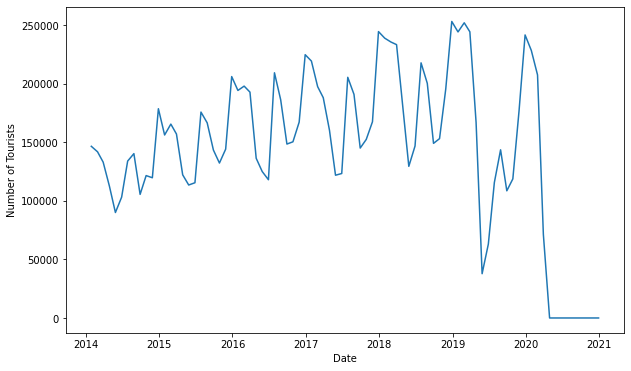

In [9]:
# plot a graph
plt.xlabel("Date")
plt.ylabel("Number of Tourists")
plt.plot(indexedDataset)

In [10]:
#Determing Rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

                Tourists
Month                   
2014-01-28           NaN
2014-02-28           NaN
2014-03-28           NaN
2014-04-28           NaN
2014-05-28           NaN
...                  ...
2020-08-28  96106.333333
2020-09-28  87058.416667
2020-10-28  77163.166667
2020-11-28  62414.500000
2020-12-28  42275.916667

[84 rows x 1 columns]                  Tourists
Month                    
2014-01-28            NaN
2014-02-28            NaN
2014-03-28            NaN
2014-04-28            NaN
2014-05-28            NaN
...                   ...
2020-08-28   97752.269968
2020-09-28  101448.218421
2020-10-28  103839.655523
2020-11-28  100900.082057
2020-12-28   84685.453696

[84 rows x 1 columns]


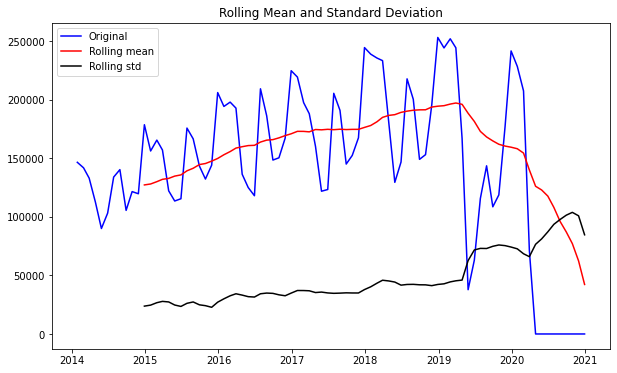

In [12]:
#plot rolling statistics:
orig = plt.plot(indexedDataset, color="blue", label="Original")
mean = plt.plot(rolmean, color="red", label="Rolling mean")
std = plt.plot(rolstd, color="black", label="Rolling std")
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

In [15]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['Tourists'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observation Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 1.057038
p-value                        0.994833
#Lags Used                    12.000000
Number of Observation Used    71.000000
Critical Value (1%)           -3.526005
Critical Value (5%)           -2.903200
Critical Value (10%)          -2.588995
dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


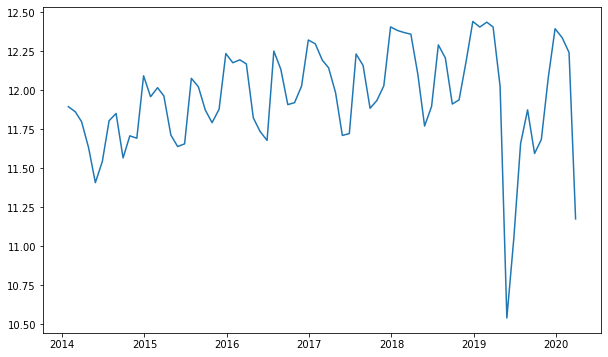

In [16]:
#estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)


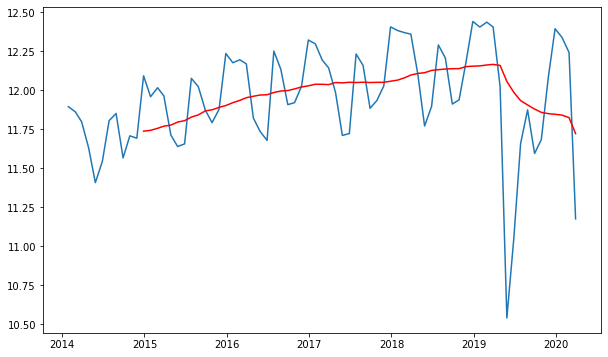

In [17]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [91]:
datasetLogScaleMinuMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinuMovingAverage.head(12)

#Remove Non values
datasetLogScaleMinuMovingAverage.dropna(inplace=True)
datasetLogScaleMinuMovingAverage.head(5)

,Tourists
Month,
2014-12-28,0.355054
2015-01-28,0.215610
2015-02-28,0.260543
2015-03-28,0.194073
2015-04-28,-0.063507


In [76]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

  #Determing Rolling Statistics
  movingAverage = timeseries.rolling(window=12).mean()
  movingSTD = timeseries.rolling(window=12).std()

  #Plot rolling statistics:
  orig = plt.plot(timeseries, color="blue", label="Original")
  mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
  std = plt.plot(movingSTD, color="Black", label="Rolling Std")
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  #Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries['Tourists'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value', '#Lags Used', 'Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

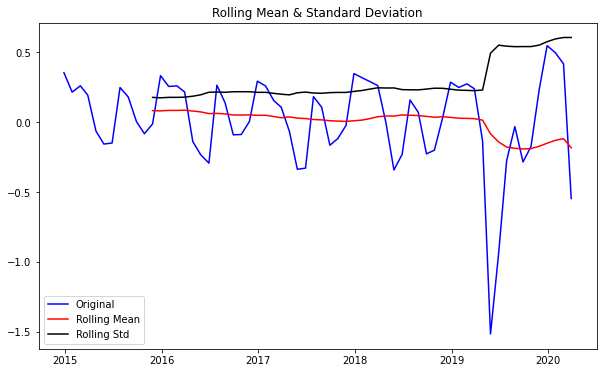

Results of Dickey-Fuller Test:
Test Statistics                 1.905339
p-value                         0.998537
#Lags Used                     11.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


In [36]:
test_stationarity(datasetLogScaleMinuMovingAverage)

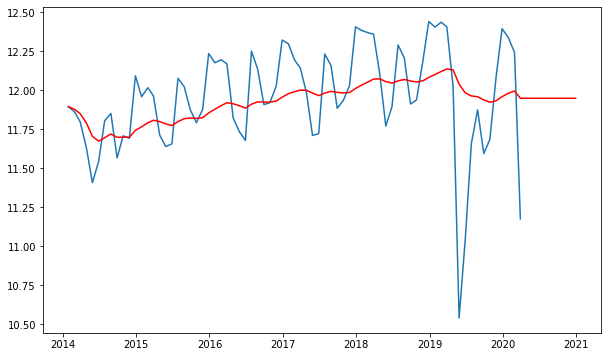

In [89]:
#Weighted Average of Time series
exponentialDecayweightAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayweightAverage, color="Red")

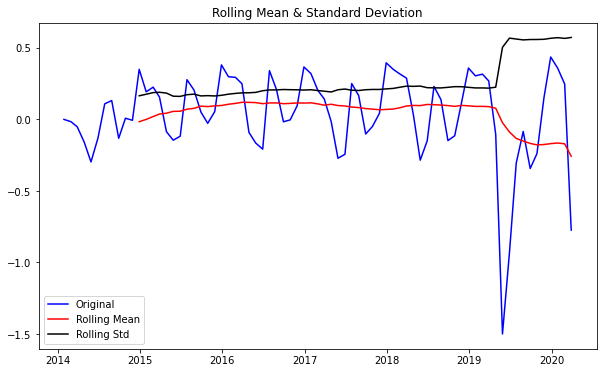

Results of Dickey-Fuller Test:


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:1269: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


MissingDataError: ignored

In [90]:
datasetLogScaleMinuMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayweightAverage
test_stationarity(datasetLogScaleMinuMovingExponentialDecayAverage)

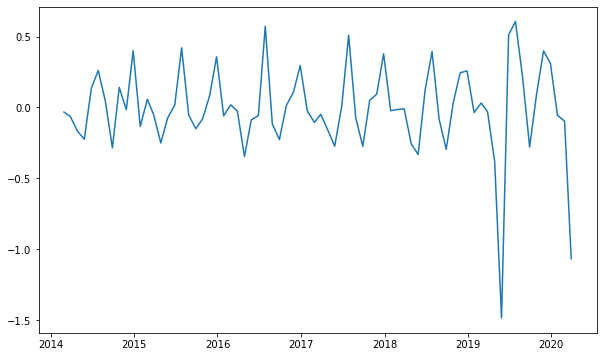

In [60]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

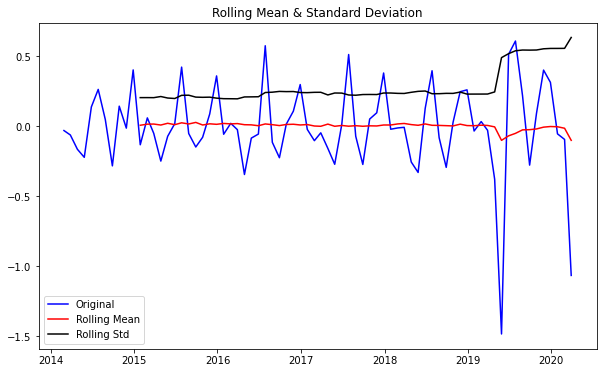

Results of Dickey-Fuller Test:
Test Statistics                      NaN
p-value                              NaN
#Lags Used                      0.000000
Number of Observations Used    74.000000
Critical Value (1%)            -3.521980
Critical Value (5%)            -2.901470
Critical Value (10%)           -2.588072
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:861: RuntimeWarning: invalid value encountered in subtract
  resid = self.endog - np.dot(self.exog, params)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1561: RuntimeWarning: invalid value encountered in subtract
  self.params, self.model.wexog)


In [85]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [86]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label="original")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)




ValueError: ignored

In [67]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

NameError: ignored

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:386: RuntimeWarning: invalid value encountered in subtract
  xo = x - x.mean()


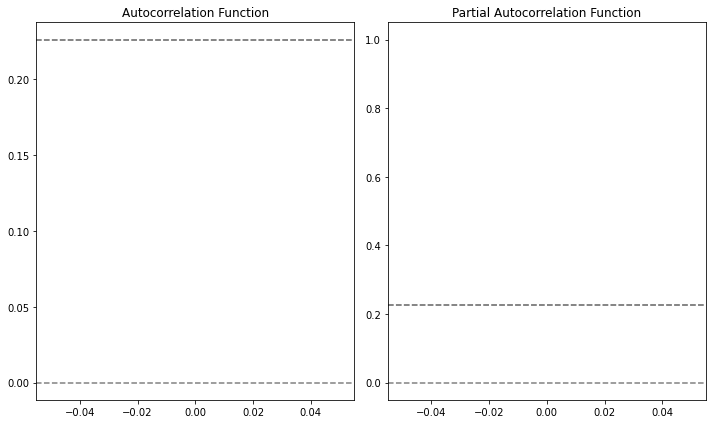

In [69]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle="--", color='gray')
plt.axhline(y= 1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle="--",color='gray')
plt.axhline(y= 1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle="--",color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle="--", color='gray')
plt.axhline(y= 1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle="--",color='gray')
plt.axhline(y= 1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle="--",color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [68]:
from statsmodels.tsa.arima_model import ARIMA
results_ARIMA.plot_predict(1,264)
#x=results_ARIMA.forecast(steps=120)

NameError: ignored